In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import pandas as pd
titanic = pd.read_csv('Titanic.csv')
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Display basic information
print("Dataset Info:\n")
print(titanic.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# Display statistical summary
print("\nDataset Description:\n")
print(titanic.describe(include='all'))


Dataset Description:

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Par

In [11]:
# Display value counts for the 'Survived' column
print("\nValue Counts for 'Survived':\n")
print(titanic['Survived'].value_counts())



Value Counts for 'Survived':

Survived
0    549
1    342
Name: count, dtype: int64


# Visualizations

=> Histogram for 'Age'

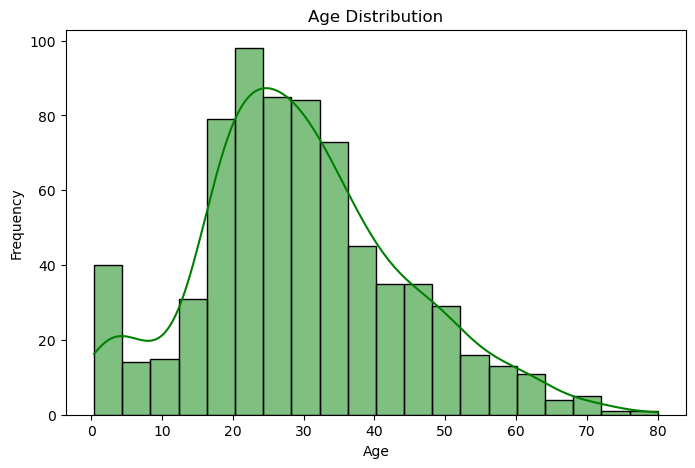

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(titanic['Age'].dropna(), kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

=>Boxplot: Age vs Survived

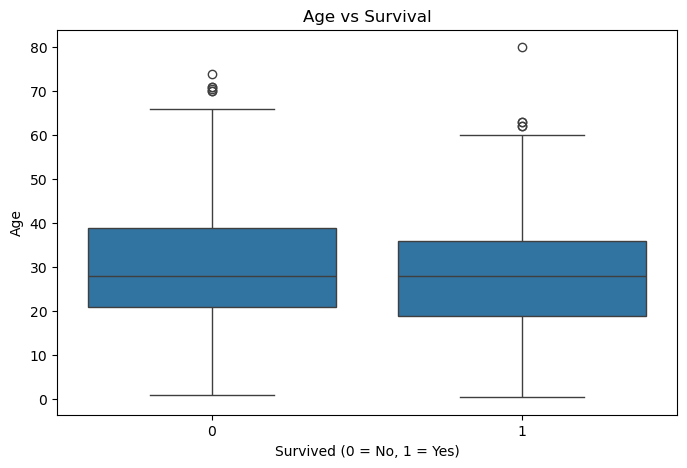

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

=>Countplot: Survival based on Gender

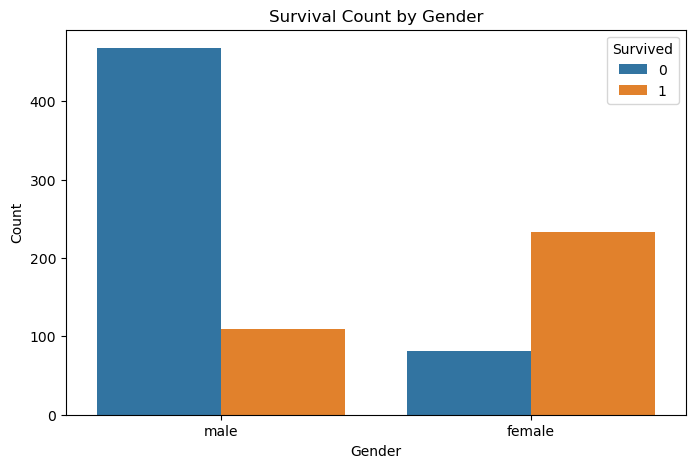

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

=> Scatterplot: Fare vs Age

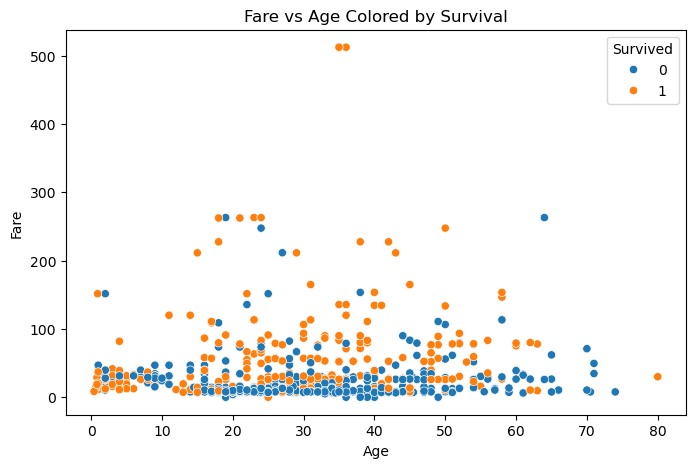

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Fare vs Age Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

=>Pairplot - Selected features

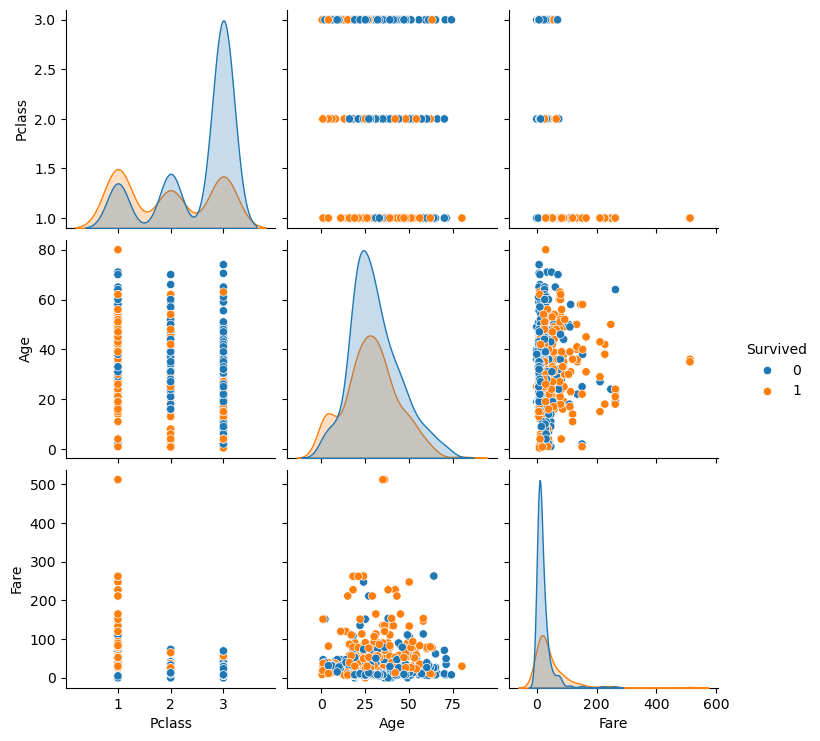

In [16]:
sns.pairplot(titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()

=>Correlation Heatmap

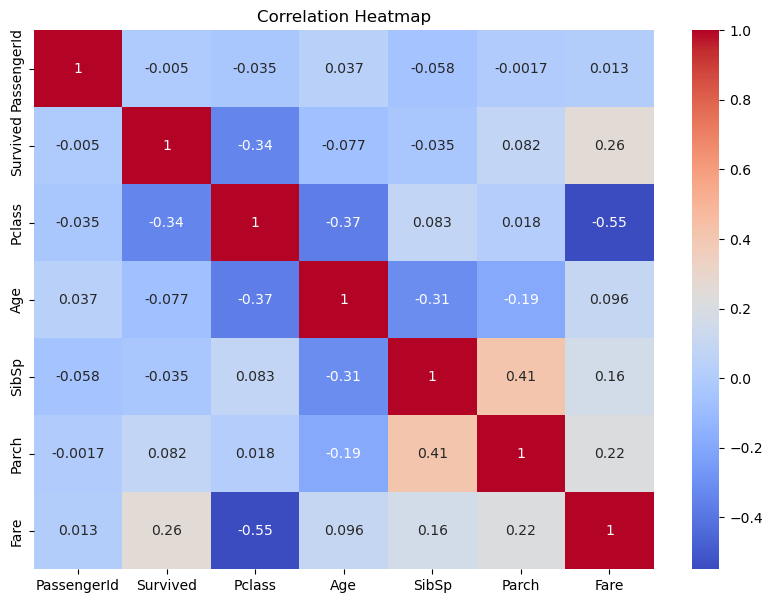

In [21]:
numeric_data = titanic.select_dtypes(include='number')
plt.figure(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

=>Violin Plot: Age vs Survived


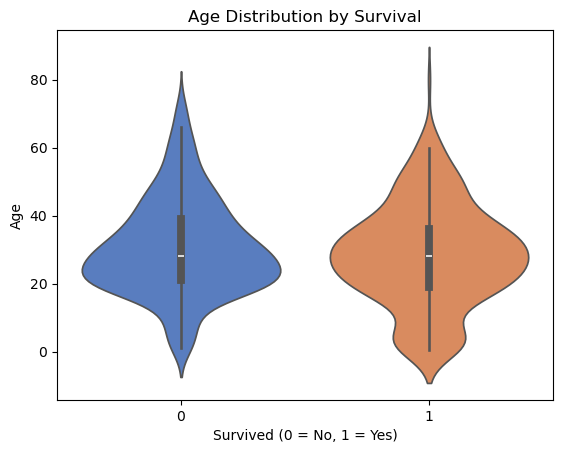

In [20]:
sns.violinplot(x='Survived', y='Age', hue='Survived', data=titanic, palette='muted', legend=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


=> Pie Chart for Survival

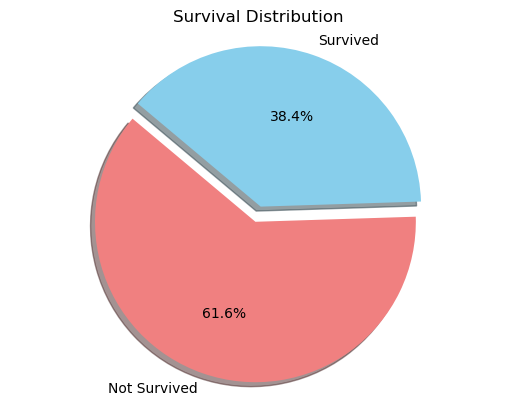

In [19]:

labels = ['Not Survived', 'Survived']
sizes = titanic['Survived'].value_counts()
colors = ['lightcoral', 'skyblue']
explode = (0.05, 0.05)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Survival Distribution')
plt.show()